In [1]:
#!/usr/bin/env python3
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
dT = 0.1
TotalTime = 5
print(TotalTime/dT + 1)
Tin = np.linspace(0, TotalTime, int(TotalTime/dT + 1))
a = 0.2
m = 1
L = a
g = 9.81
sys_tf = signal.TransferFunction([1], [m*L**2, 0, -m*g*L+0.02])
print(sys_tf)

51.0
TransferFunctionContinuous(
array([25.]),
array([  1.  ,   0.  , -48.55]),
dt: None
)


In [2]:
sys_tf = signal.tf2ss([1], [m*L**2, 0, -m*g*L+0.02])
print(sys_tf)

(array([[-0.  , 48.55],
       [ 1.  ,  0.  ]]), array([[1.],
       [0.]]), array([[ 0., 25.]]), array([[0.]]))


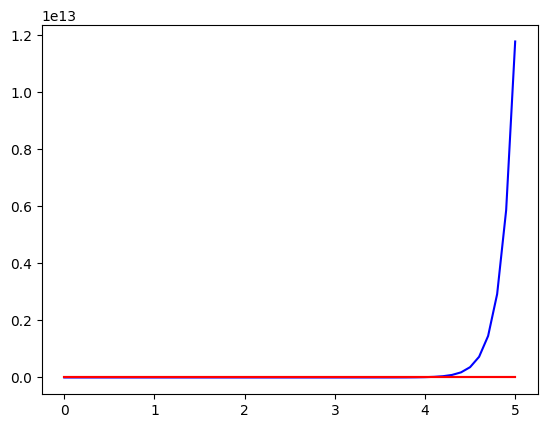

In [3]:
zero_input = np.zeros(Tin.shape) # не будем прилагать момент
start_pos = 1 / 180.0*np.pi # начнём с позиции в 0.001°.
Tout,yout,xout = signal.lsim(sys_tf, zero_input, Tin, X0=[0, start_pos/25]) # начальная скорость нулевая, угол - start_pos
plt.plot(Tout, yout, 'b')
# покажем предельные допустимые отклонения красными линиями
limit = 15 / 180 * np.pi
plt.plot([0, TotalTime], [limit, limit], 'r')
plt.plot([0, TotalTime], [-limit, -limit], 'r')
plt.show()


In [7]:
P = 1
I = 0
D = 0
PID_num = [D, P, I]
PID_den = [1, 0]
interm_num = np.convolve([1], PID_num)
interm_den = np.convolve([m*L**2, 0, -m*g*L+0.02], PID_den)
total_sys = signal.tf2ss(interm_den, np.polyadd(interm_den,
interm_num))
print(total_sys)

(array([[-0.  , 23.55, -0.  ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ]]), array([[1.],
       [0.],
       [0.]]), array([[  0., -25.,   0.]]), array([[1.]]))


In [8]:
zero_input = np.zeros(Tin.shape) # не будем прилагать момент
start_pos = 1 / 180.0*np.pi # начнём с позиции в 0.001°.
Tout,yout,xout = signal.lsim(total_sys, zero_input, Tin, X0=[0, start_pos/25]) # начальная скорость нулевая, угол - start_pos
plt.plot(Tout, yout, 'b')
# покажем предельные допустимые отклонения красными линиями
limit = 15 / 180 * np.pi
plt.plot([0, TotalTime], [limit, limit], 'r')
plt.plot([0, TotalTime], [-limit, -limit], 'r')
plt.show()

ValueError: could not broadcast input array from shape (2,) into shape (3,)